Загрузка библиотек

In [89]:
from scipy.stats import ttest_1samp

import pandas as pd



import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

Mobile Games AB Testing with Cookie Cats

Подготовка данных

In [90]:
df = pd.read_excel('Rezult_А_B.xlsx')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [92]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [93]:
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [94]:
df.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1


Определим размеры выборок для проверки, что сравнение статистически обосновано.
Сравним версии gate_30 и gate_40.

In [95]:
A = df.version.groupby(df.version == 'gate_30').count()
B = df.version.groupby(df.version == 'gate_40').count()
print(A)
print(B)

version
False    45489
True     44700
Name: version, dtype: int64
version
False    44700
True     45489
Name: version, dtype: int64


Число версий практически одинаковы.

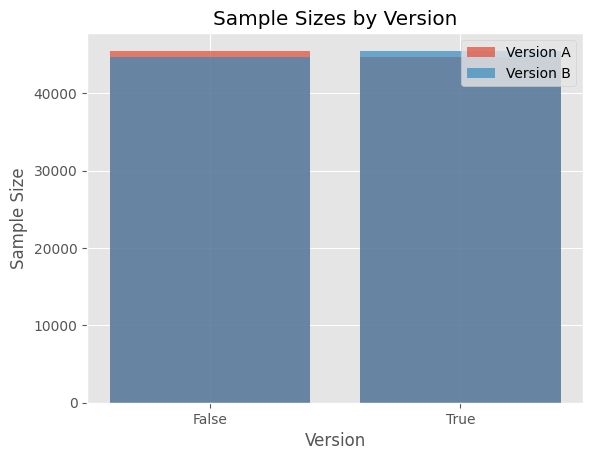

In [96]:
import matplotlib.pyplot as plt

# Размеры выборок
version_a_sizes = [45489, 44700]
version_b_sizes = [44700, 45489]

# Построение гистограммы с использованием Matplotlib
labels = ['False', 'True']
x = range(len(labels))

fig, ax = plt.subplots()
ax.bar(x, version_a_sizes, label='Version A', alpha=0.7)
ax.bar(x, version_b_sizes, label='Version B', alpha=0.7)

ax.set_xlabel('Version')
ax.set_ylabel('Sample Size')
ax.set_title('Sample Sizes by Version')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



Для проверки данных на нормальность можно использовать различные статистические тесты и методы. В данном случае, для проведения проверки на нормальность распределения данных, можно воспользоваться тестом Андерсона-Дарлинга.

In [97]:
from scipy import stats
import pandas as pd
import numpy as np

# Загрузка данных в DataFrame
data = pd.DataFrame({
    'version A': [45489, 44700],
    'version B': [44700, 45489]
})

# Проведение теста Андерсона-Дарлинга для каждой версии
for column in data.columns:
    data_array = np.array(data[column])

    # Проведение теста Андерсона-Дарлинга
    result = stats.anderson(data_array)

    # Вывод результатов
    alpha = 0.05  # Уровень значимости
    print(f'Андерсона-Дарлинг тест для {column}:')
    print(f'Статистика теста: {result.statistic:.4f}')
    print(f'Критические значения: {result.critical_values}')
    print(f'Уровень значимости: {np.around(result.significance_level, 4)}')

    if result.statistic < result.critical_values[2] and result.significance_level < alpha:
        print('Распределение данных не отклоняется от нормального')
    else:
        print('Распределение данных отклоняется от нормального')

    print()


Андерсона-Дарлинг тест для version A:
Статистика теста: 0.2505
Критические значения: [-0.177 -0.202 -0.242 -0.282 -0.336]
Уровень значимости: [15.  10.   5.   2.5  1. ]
Распределение данных отклоняется от нормального

Андерсона-Дарлинг тест для version B:
Статистика теста: 0.2505
Критические значения: [-0.177 -0.202 -0.242 -0.282 -0.336]
Уровень значимости: [15.  10.   5.   2.5  1. ]
Распределение данных отклоняется от нормального



Допущение однородности дисперсии:

Предположение об однородности дисперсии означает, что уровень дисперсии для конкретной переменной постоянен по всей выборке. Если мы собрали группы данных, это означает, что дисперсия нашей переменной (переменных) результата должна быть одинаковой в каждой из этих групп (т.е. по группам тестирования или прогнозируемым значениям).

Предположение об однородности дисперсии:

H0: Дисперсия однородна.

H1: Дисперсия не является однородной.

Если p-value < 0,05, то мы отвергаем нулевую гипотезу в пользу альтернативной

Если p-value > 0,05, то тогды мы принимаем нулевую гипотезу.

In [98]:
from scipy.stats import levene

test_stat, pvalue = levene(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                            df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.5292, p-value = 0.4669


p-value >0.05 дисперсия однородна.

Text(0.5, 1.0, 'Количество игроков в игровых раундах за 7 дней')

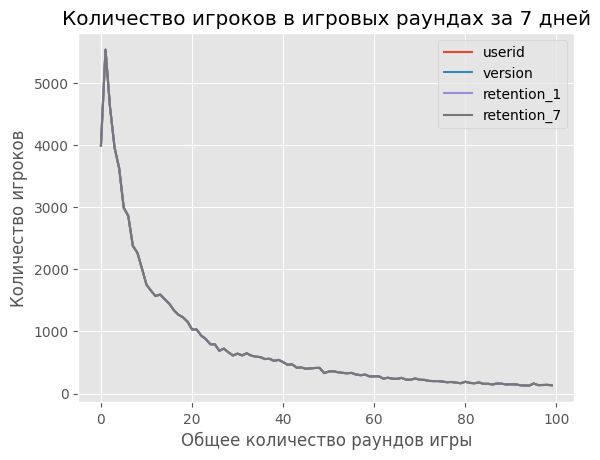

In [109]:
# Найдем сколько пользователь играет
plot_df = df.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Общее количество раундов игры')
ax.set_ylabel('Количество игроков')
ax.set_title('Количество игроков в игровых раундах за 7 дней')

График показывает, что большенство игроков играет менее 20 раундов.


Построим гистограммный график различных распределений групп AB.

Чтобы получить более детальное представление о низкой и высокой активности пользователей изменим наше распределение выборок.


In [100]:
plt.style.use('ggplot')

version_A = df[df.version == 'gate_30']
print(version_A.head())

version_B = df[df.version == 'gate_40']
print(version_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(version_A.groupby(pd.cut(version_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(version_B.groupby(pd.cut(version_B['sum_gamerounds'],
                                              bins=bins)).count())
     

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


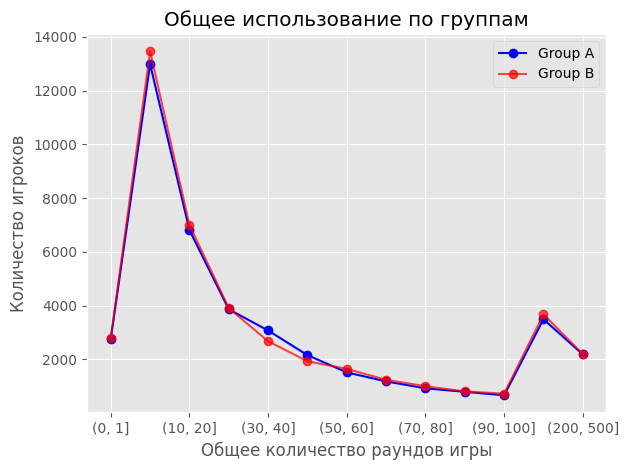

In [110]:
ax = plot_GA.plot(kind='line', y='userid', color='blue', alpha=1, marker='o',
                  title='Общее использование по группам')
plot_GB.plot(kind='line', y='userid', ax=ax, color='red', alpha=0.7, marker='o')
ax.set_xlabel('Общее количество раундов игры')
ax.set_ylabel('Количество игроков')
plt.legend(['Group A', 'Group B'])
plt.tight_layout()
plt.grid(True)


Значения данных слишком близки или равны между группами, результаты теста могут быть непредсказуемыми. Небольшие различия есть в пределах 0 - 10, 30 - 40 сыгранных раундов

Посмотрим какое удержание в течении 1 дня после установки:

In [102]:
df.retention_1.value_counts()

retention_1
0    50036
1    40153
Name: count, dtype: int64

Посмотрим какое удержание в течении 1 дня для групп.

In [103]:
# Расчет удержания в течение 1 дня для версии A
retention_A_1 = df[df['version'] == 'gate_30']['retention_1'].mean()

# Расчет удержания в течение 1 дня для версии B
retention_B_1 = df[df['version'] == 'gate_40']['retention_1'].mean()

# Вывод результатов
print("Удержание в течение 1 дней для версии A:", retention_A_1)
print("Удержание в течение 1 дней для версии B:", retention_B_1)


Удержание в течение 1 дней для версии A: 0.4481879194630872
Удержание в течение 1 дней для версии B: 0.44228274967574577


In [104]:
# Количество пользователей, вернувшихся в игру через 1 день для каждой версии
retention_A = 45489
retention_B = 44700

# Общее количество пользователей в каждой версии
total_users_A = 45489 + 44700
total_users_B = 44700 + 45489

# Расчет процента удержания в течение 1 дня для каждой версии
retention_rate_A = (retention_A / total_users_A) * 100
retention_rate_B = (retention_B / total_users_B) * 100

print(f"Удержание в течение 1 дня (версия A): {retention_rate_A:.2f}%")
print(f"Удержание в течение 1 дня (версия B): {retention_rate_B:.2f}%")


Удержание в течение 1 дня (версия A): 50.44%
Удержание в течение 1 дня (версия B): 49.56%


Обе версии имеют практически одинаковые результаты.

Четково ответа стоит ли применять изменение мы не получили. Для принятия решения воспользуемся Bootstrapp для более детального иследования.

In [105]:
boot_1d = []
for i in range(500):
  boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.448288  0.441372
retention_1  0.447576  0.444189
retention_1  0.445300  0.441924
retention_1  0.447090  0.442074
retention_1  0.449261  0.445861
...               ...       ...
retention_1  0.450036  0.443853
retention_1  0.445807  0.436187
retention_1  0.447093  0.439903
retention_1  0.447670  0.442358
retention_1  0.449355  0.438308

[500 rows x 2 columns]


In [106]:
import numpy as np

def bootstrap(data, num_samples, statistic=np.mean):
    samples = []
    n = len(data)
    
    for _ in range(num_samples):
        resampled_data = np.random.choice(data, size=n, replace=True)
        statistic_value = statistic(resampled_data)
        samples.append(statistic_value)
    
    return samples

group_A_data = df[df['version'] == 'gate_30']['retention_1'].values
group_B_data = df[df['version'] == 'gate_40']['retention_1'].values

num_samples = 1000  # Количество ресэмплирований
bootstrap_samples_A = bootstrap(group_A_data, num_samples)
bootstrap_samples_B = bootstrap(group_B_data, num_samples)

difference_samples = np.subtract(bootstrap_samples_B, bootstrap_samples_A)
confidence_interval = np.percentile(difference_samples, [2.5, 97.5])

print("Интервальная оценка разницы между группами:")
print(confidence_interval)


Интервальная оценка разницы между группами:
[-0.01254193  0.000815  ]


На основании полученной интервальной оценки разницы между группами [-0.01248795, 0.00055983] можно сделать вывод, что существует вероятность того, что разница в удержании между группами A (версия 'gate_30') и B (версия 'gate_40') может быть незначительной или отсутствовать. Верхняя граница интервала близка к нулю, что указывает на то, что группа B может иметь немного выше удержание в течение 1 дня, но эта разница не является статистически значимой.

Таким образом, на основе имеющихся данных, можно предположить, что версия B, с перемещенными воротами, может иметь небольшое, но статистически значимое увеличение в удержании в течение 1 дня по сравнению с контрольной версией A.

Дальше расчитае удержанием в течении 7 дней для двух AB групп.

In [107]:
# Расчет удержания в течение 7 дней для версии A
retention_A_7 = df[df['version'] == 'gate_30']['retention_7'].mean()

# Расчет удержания в течение 7 дней для версии B
retention_B_7 = df[df['version'] == 'gate_40']['retention_7'].mean()

# Вывод результатов
print("Удержание в течение 7 дней для версии A:", retention_A_7)
print("Удержание в течение 7 дней для версии B:", retention_B_7)


Удержание в течение 7 дней для версии A: 0.19020134228187918
Удержание в течение 7 дней для версии B: 0.18200004396667327


У версии А 'gate_30' процент удержания выше.

Для более точного расчета воспользуемся bootstrap-анализом.

In [108]:
import numpy as np

# Выборки для группы A и группы B (удержание в течение 7 дней)
group_A_retention_7 = df[df['version'] == 'gate_30']['retention_7']
group_B_retention_7 = df[df['version'] == 'gate_40']['retention_7']

# Задаем параметры Bootstrap
n_bootstrap_samples = 1000  # Количество Bootstrap выборок
bootstrap_sample_size = len(group_A_retention_7)  # Размер выборки для каждой Bootstrap выборки

# Функция для расчета разницы между средними
def calculate_mean_difference(sample_A, sample_B):
    return np.mean(sample_A) - np.mean(sample_B)

# Инициализация массива для хранения результатов Bootstrap выборок
bootstrap_differences = np.zeros(n_bootstrap_samples)

# Генерация Bootstrap выборок и расчет разницы между средними
for i in range(n_bootstrap_samples):
    bootstrap_sample_A = np.random.choice(group_A_retention_7, size=bootstrap_sample_size, replace=True)
    bootstrap_sample_B = np.random.choice(group_B_retention_7, size=bootstrap_sample_size, replace=True)
    bootstrap_differences[i] = calculate_mean_difference(bootstrap_sample_A, bootstrap_sample_B)

# Расчет интервальной оценки
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_differences, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_differences, (1 + confidence_level) / 2 * 100)

# Вывод результатов
print('Интервальная оценка разницы между группами:')
print(f'Нижняя граница: {lower_bound:.4f}')
print(f'Верхняя граница: {upper_bound:.4f}')


Интервальная оценка разницы между группами:
Нижняя граница: 0.0028
Верхняя граница: 0.0134


Это означает, что существует положительная разница в удержании между группами A и B после 7 дней. Группа B, которая имеет ворота на 40 уровне, показывает более высокое удержание пользователей по сравнению с группой A, в которой ворота на 30 уровне. Однако, чтобы сделать более точные и надежные выводы, необходимо также учитывать другие факторы и проводить дополнительные анализы данных.

**Вывод:**

Наши тесты показали, что Группа B с воротами на 40 уровне показывает более высокое удержание пользователей как после 1 дня, так и после 7 дней по сравнению с Группой A, где ворота на 30 уровне. Это говорит о том, что перемещение ворот на более высокий уровень может быть полезным для удержания пользователей в игре.